<a href="https://colab.research.google.com/github/adubrightkwartengsnr/AdjacentElementsProduct/blob/main/Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mysqlclient

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mysqlclient: filename=mysqlclient-2.2.1-cp310-cp310-linux_x86_64.whl size=123919 sha256=66de616b0a871b9aa78693c8be0e2f890a89e015384a2ee2bd1c0b22cdf43615
  Stored in directory: /root/.cache/pip/wheels/93/84/49/615c5604001ebe3bb11c45628f22102cf563d6766a43a0e7a1
Successfully built mysqlclient


In [ ]:
from sqlalchemy import create_engine,text
import pandas as pd
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv


In [ ]:
# load environment variables
load_dotenv('/env_variables.txt')
HOST_AND_PORT = os.getenv('DB_HOST_AND_PORT')
DB_NAME = os.getenv('DB_NAME')
USERNAME = os.getenv('DB_USERNAME')
PASSWORD = os.getenv('DB_PASSWORD')
print(HOST_AND_PORT)

20.218.241.192:3306


In [ ]:
# create the database engine connection
db_connector = create_engine(f'mysql://{USERNAME}:{PASSWORD}@{HOST_AND_PORT}/{DB_NAME}')
db_query = text('''
        SELECT * FROM customer as cu
        INNER JOIN payment as py
        ON cu.customer_id = py.customer_id
    ''')

cust_pay_df = pd.read_sql(db_query,db_connector.connect())

In [ ]:
# first five rows
cust_pay_df.head()

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20,1,1,1,76,2.99,2005-05-25 11:30:37,2006-02-15 22:12:30
1,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20,2,1,1,573,0.99,2005-05-28 10:35:23,2006-02-15 22:12:30
2,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20,3,1,1,1185,5.99,2005-06-15 00:54:12,2006-02-15 22:12:30
3,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20,4,1,2,1422,0.99,2005-06-15 18:02:53,2006-02-15 22:12:30
4,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20,5,1,2,1476,9.99,2005-06-15 21:08:46,2006-02-15 22:12:30


In [ ]:
# check the shape of the data
cust_pay_df.shape

(16044, 16)

In [ ]:
# show summary statics of data
cust_pay_df.describe()

,customer_id,store_id,address_id,active,payment_id,customer_id,staff_id,rental_id,amount
count,16044.000000,16044.000000,16044.000000,16044.000000,16044.000000,16044.000000,16044.000000,16044.000000,16044.000000
mean,297.143169,1.454812,301.858514,0.974819,8024.483732,297.143169,1.498005,8025.371478,4.201356
std,172.453136,0.497969,173.085371,0.156679,4632.695501,172.453136,0.500012,4632.777249,2.362961
min,1.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,148.000000,1.000000,152.000000,1.000000,4012.750000,148.000000,1.000000,4013.750000,2.990000
50%,296.000000,1.000000,301.000000,1.000000,8024.500000,296.000000,1.000000,8025.500000,3.990000
75%,446.000000,2.000000,451.000000,1.000000,12036.250000,446.000000,2.000000,12037.250000,4.990000
max,599.000000,2.000000,605.000000,1.000000,16049.000000,599.000000,2.000000,16049.000000,11.990000


In [ ]:
# info about the data
cust_pay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   customer_id   16044 non-null  int64         
 1   store_id      16044 non-null  int64         
 2   first_name    16044 non-null  object        
 3   last_name     16044 non-null  object        
 4   email         16044 non-null  object        
 5   address_id    16044 non-null  int64         
 6   active        16044 non-null  int64         
 7   create_date   16044 non-null  datetime64[ns]
 8   last_update   16044 non-null  datetime64[ns]
 9   payment_id    16044 non-null  int64         
 10  customer_id   16044 non-null  int64         
 11  staff_id      16044 non-null  int64         
 12  rental_id     16044 non-null  int64         
 13  amount        16044 non-null  float64       
 14  payment_date  16044 non-null  datetime64[ns]
 15  last_update   16044 non-null  dateti

<Axes: xlabel='active'>

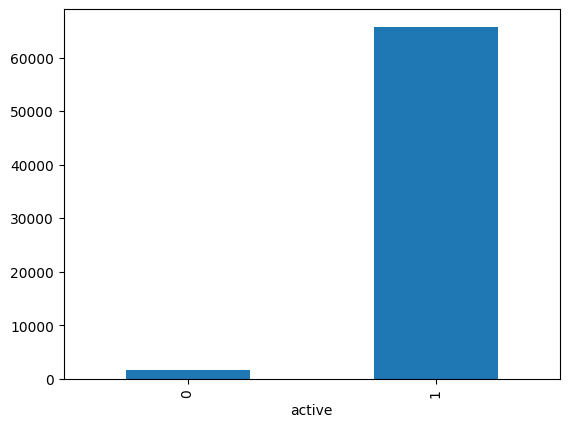

In [ ]:
# plot to show revenue based on the active status
(
    cust_pay_df
#     group by customer active status
    .groupby('active')
#     select the amount column
    ['amount']
#     sum the amount
    .sum()
#     plot a bar graph to represent the data
    .plot(kind='bar')

)


In [ ]:
db_query_1 = text('''
            SELECT * FROM staff as st
            INNER JOIN payment as py
            ON st.staff_id = py.staff_id
            ''')

staff_pay_df = pd.read_sql(db_query_1,db_connector.connect())

In [ ]:
# preview of first five rows
staff_pay_df.head()

,staff_id,first_name,last_name,address_id,picture,email,store_id,active,username,password,last_update,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,1,Mike,Hillyer,3,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,Mike.Hillyer@sakilastaff.com,1,1,Mike,8cb2237d0679ca88db6464eac60da96345513964,2006-02-15 03:57:16,1,1,1,76,2.99,2005-05-25 11:30:37,2006-02-15 22:12:30
1,1,Mike,Hillyer,3,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,Mike.Hillyer@sakilastaff.com,1,1,Mike,8cb2237d0679ca88db6464eac60da96345513964,2006-02-15 03:57:16,2,1,1,573,0.99,2005-05-28 10:35:23,2006-02-15 22:12:30
2,1,Mike,Hillyer,3,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,Mike.Hillyer@sakilastaff.com,1,1,Mike,8cb2237d0679ca88db6464eac60da96345513964,2006-02-15 03:57:16,3,1,1,1185,5.99,2005-06-15 00:54:12,2006-02-15 22:12:30
3,1,Mike,Hillyer,3,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,Mike.Hillyer@sakilastaff.com,1,1,Mike,8cb2237d0679ca88db6464eac60da96345513964,2006-02-15 03:57:16,6,1,1,1725,4.99,2005-06-16 15:18:57,2006-02-15 22:12:30
4,1,Mike,Hillyer,3,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,Mike.Hillyer@sakilastaff.com,1,1,Mike,8cb2237d0679ca88db6464eac60da96345513964,2006-02-15 03:57:16,7,1,1,2308,4.99,2005-06-18 08:41:48,2006-02-15 22:12:30


In [ ]:
# display the shape of the data
staff_pay_df.shape

(16044, 18)

In [ ]:
# show the descriptive statistics of the data
staff_pay_df.describe()

,staff_id,address_id,store_id,active,payment_id,customer_id,staff_id,rental_id,amount
count,16044.000000,16044.000000,16044.000000,16044.0,16044.000000,16044.000000,16044.000000,16044.000000,16044.000000
mean,1.498005,3.498005,1.498005,1.0,8024.483732,297.143169,1.498005,8025.371478,4.201356
std,0.500012,0.500012,0.500012,0.0,4632.695501,172.453136,0.500012,4632.777249,2.362961
min,1.000000,3.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,3.000000,1.000000,1.0,4012.750000,148.000000,1.000000,4013.750000,2.990000
50%,1.000000,3.000000,1.000000,1.0,8024.500000,296.000000,1.000000,8025.500000,3.990000
75%,2.000000,4.000000,2.000000,1.0,12036.250000,446.000000,2.000000,12037.250000,4.990000
max,2.000000,4.000000,2.000000,1.0,16049.000000,599.000000,2.000000,16049.000000,11.990000


In [ ]:
# preview info about the data
staff_pay_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   staff_id      16044 non-null  int64         
 1   first_name    16044 non-null  object        
 2   last_name     16044 non-null  object        
 3   address_id    16044 non-null  int64         
 4   picture       8054 non-null   object        
 5   email         16044 non-null  object        
 6   store_id      16044 non-null  int64         
 7   active        16044 non-null  int64         
 8   username      16044 non-null  object        
 9   password      8054 non-null   object        
 10  last_update   16044 non-null  datetime64[ns]
 11  payment_id    16044 non-null  int64         
 12  customer_id   16044 non-null  int64         
 13  staff_id      16044 non-null  int64         
 14  rental_id     16044 non-null  int64         
 15  amount        16044 non-null  float6

<Axes: title={'center': 'Revenue Generated By Staff'}, ylabel='amount'>

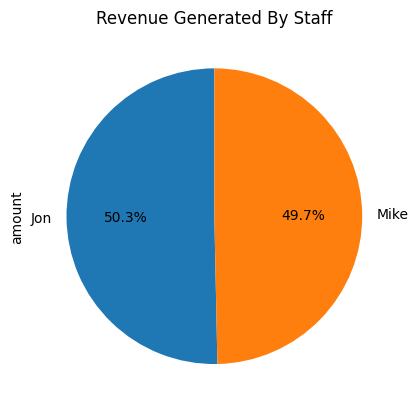

In [ ]:
# revenues generated by staff
revenue_by_staff = staff_pay_df.groupby('first_name') ['amount'].sum()
# total revenue
total_revenue = staff_pay_df['amount'].sum()
# percentage revenue generated by each staff
percentage_revenue = (revenue_by_staff/total_revenue)*100
percentage_revenue.plot(kind='pie',title='Revenue Generated By Staff',autopct='%1.1f%%',startangle=90)

In [ ]:
db_query_2 = text('''
            SELECT * FROM rental
            ''')

rental_df = pd.read_sql(db_query_2,db_connector.connect())

In [ ]:

# view first five rows
rental_df.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53
1,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-15 21:30:53
2,3,2005-05-24 23:03:39,1711,408,2005-06-01 22:12:39,1,2006-02-15 21:30:53
3,4,2005-05-24 23:04:41,2452,333,2005-06-03 01:43:41,2,2006-02-15 21:30:53
4,5,2005-05-24 23:05:21,2079,222,2005-06-02 04:33:21,1,2006-02-15 21:30:53


In [ ]:
# display the shape of the dataframe
rental_df.shape

(16044, 7)

In [ ]:
# descriptive statistics of data
rental_df.describe()

,rental_id,inventory_id,customer_id,staff_id
count,16044.000000,16044.000000,16044.000000,16044.000000
mean,8025.371478,2291.842558,297.143169,1.498878
std,4632.777249,1322.210643,172.453136,0.500014
min,1.000000,1.000000,1.000000,1.000000
25%,4013.750000,1154.000000,148.000000,1.000000
50%,8025.500000,2291.000000,296.000000,1.000000
75%,12037.250000,3433.000000,446.000000,2.000000
max,16049.000000,4581.000000,599.000000,2.000000


In [ ]:
# view information about the data
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   rental_id     16044 non-null  int64         
 1   rental_date   16044 non-null  datetime64[ns]
 2   inventory_id  16044 non-null  int64         
 3   customer_id   16044 non-null  int64         
 4   return_date   15861 non-null  datetime64[ns]
 5   staff_id      16044 non-null  int64         
 6   last_update   16044 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(4)
memory usage: 877.5 KB


<Axes: title={'center': 'Line Chart To Show Monthly Rentals'}, xlabel='rental_date', ylabel='Rentals'>

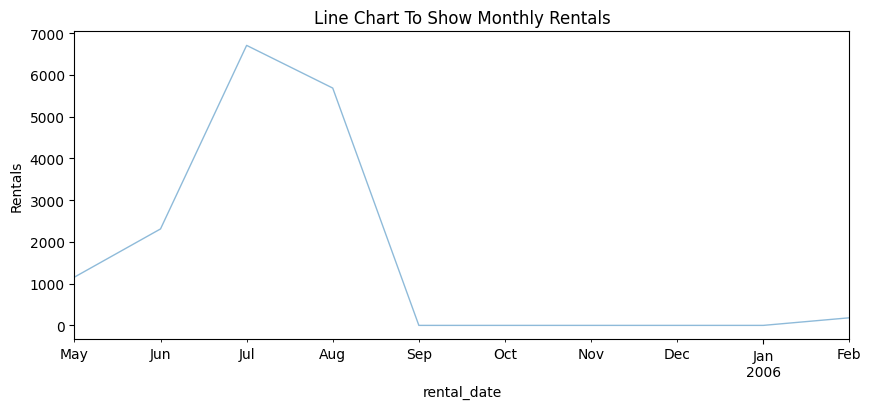

In [ ]:
# Time series analysis of store
plt.title('Line Chart To Show Monthly Rentals')
plt.xlabel('Month')
plt.ylabel('Rentals')
(
    rental_df
    # Important to set the date time as index
    .set_index('rental_date')
    # Sort index in ascenting order
    .sort_index(ascending=True)
     # Select the rental_id col
    ['rental_id']
    # Resample to Monthly
    .resample('M')
    # Aggregate by counting rentals for the month
    .count()
    # Plot the records
    .plot(figsize=(10,4), alpha =.5, linewidth=1, label='Monthly Rentals')
)


In [ ]:
db_query_3 = text('''
            SELECT * FROM payment
            ''')

pay_df = pd.read_sql(db_query_3,db_connector.connect())

In [ ]:
# preview the first five rows
pay_df.head()

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,1,1,1,76,2.99,2005-05-25 11:30:37,2006-02-15 22:12:30
1,2,1,1,573,0.99,2005-05-28 10:35:23,2006-02-15 22:12:30
2,3,1,1,1185,5.99,2005-06-15 00:54:12,2006-02-15 22:12:30
3,4,1,2,1422,0.99,2005-06-15 18:02:53,2006-02-15 22:12:30
4,5,1,2,1476,9.99,2005-06-15 21:08:46,2006-02-15 22:12:30


In [ ]:
# show information about data
pay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   payment_id    16044 non-null  int64         
 1   customer_id   16044 non-null  int64         
 2   staff_id      16044 non-null  int64         
 3   rental_id     16044 non-null  int64         
 4   amount        16044 non-null  float64       
 5   payment_date  16044 non-null  datetime64[ns]
 6   last_update   16044 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(4)
memory usage: 877.5 KB


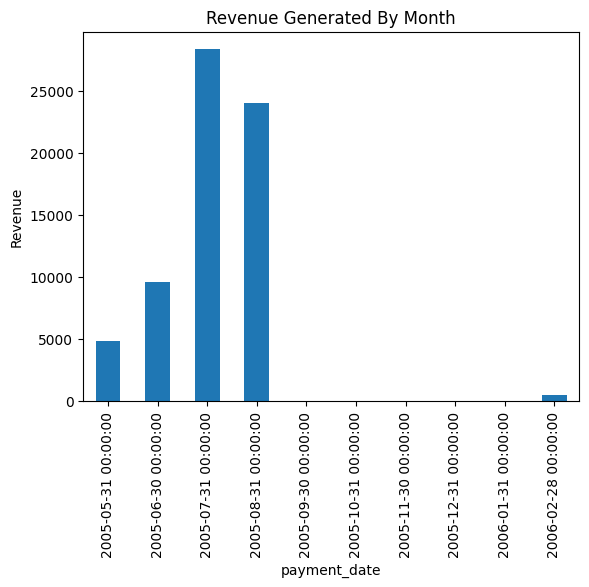

In [50]:
# plot to show monthly revenue by Month
plt.title('Revenue Generated By Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
payment_date_as_index = pay_df.set_index('payment_date').sort_index(ascending=True)
monthly_revenue =payment_date_as_index['amount'].resample('M').sum()
# monthly_revenue.plot(kind="bar")

monthly_revenue.plot(kind='bar', x=monthly_revenue.index.strftime('%B'))
plt.show()